# Segmentation Proof of Concept

main goal is to establish an ROI for initial frame stabilizing and for choosing where to measure quality

because of that I think we can deal with a slightly sloppy method

let's start with some somple thresholding since we are dealing with

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in test image
jupiter = cv2.imread("../test/data/images/jupiter_stacked.png")
jupiter_frame1 = cv2.imread("../test/data/images/jupiter_frame_highq.png")
jupiter_frame2 = cv2.imread("../test/data/images/jupiter_frame_lowq.png")
jupiter = cv2.imread("../test/data/images/jupiter_stacked.png")
moon = cv2.imread("../test/data/images/moon_stacked_sharpened.jpg")

print(jupiter.dtype)

uint8


In [3]:
def plot(img, color = True):   
    # plt.figure(figsize=(10,10))
    if color:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap="gray")
    plt.show()

def plot_pair(img1, img2):
    # plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.show()

# plots mask with green overlay
def plot_overlay(img, mask):
    color_mask = np.stack([mask, mask, mask], axis=2)
    color_mask[:, :, 0][mask == 255] = 0
    color_mask[:, :, 2][mask == 255] = 0

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.imshow(color_mask, alpha=0.2)
    plt.show()

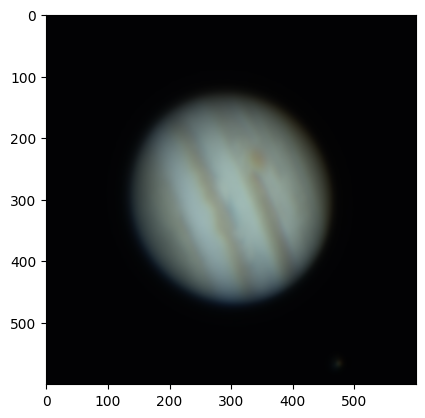

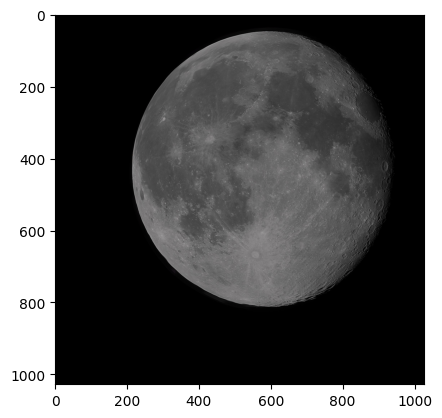

In [5]:
plot(jupiter)
plot(moon)

## Play around with some basics

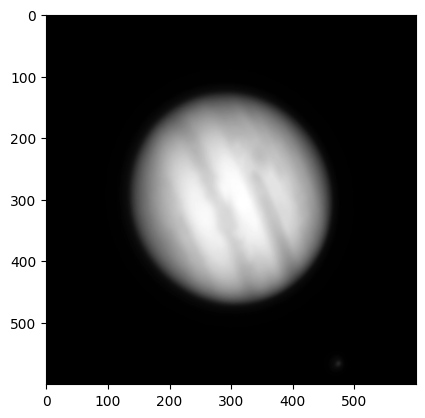

In [6]:
# try applying on luminance channel
jupiter_lum = cv2.cvtColor(jupiter, cv2.COLOR_BGR2Lab)[:, :, 0]

plot(jupiter_lum, False)

In [7]:
# we will want to use this but for the test image isnt noisy

# # fast blur - goal is to get rid of high frequency noise
# luminance = cv2.GaussianBlur(luminance, (5, 5), 0)

uint8
(600, 600)


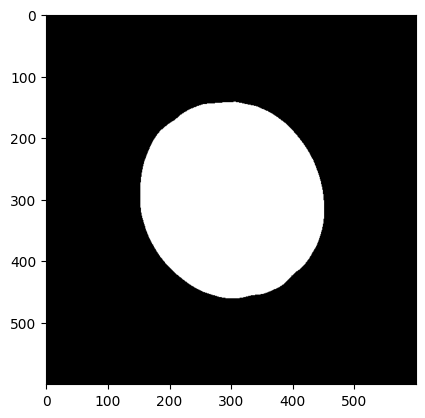

In [8]:
# otsu method
_, jupiter_mask = cv2.threshold(
    jupiter_lum, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
print(jupiter_mask.dtype)
print(jupiter_mask.shape)

plot(jupiter_mask, False)

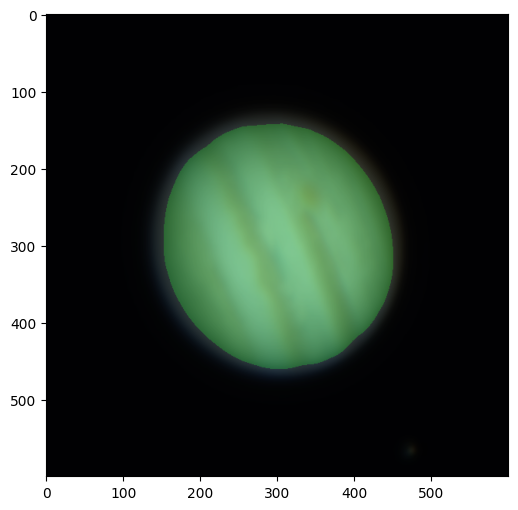

In [9]:
# view with an overlay of mask
plot_overlay(jupiter, jupiter_mask)

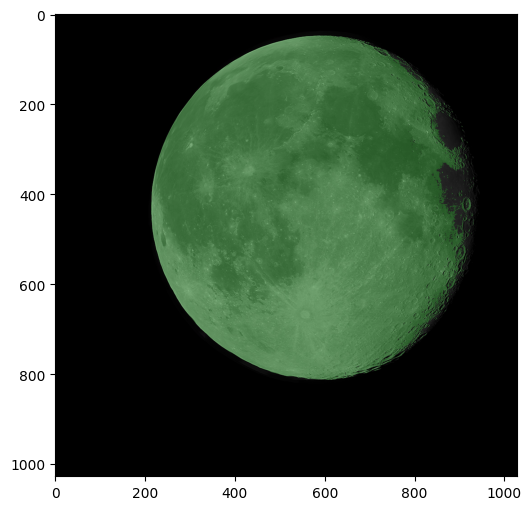

In [10]:
# luminance
moon_lum = cv2.cvtColor(moon, cv2.COLOR_BGR2Lab)[:, :, 0]

# otsu threshold binarization
_, moon_mask = cv2.threshold(
    moon_lum, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

plot_overlay(moon, moon_mask)

67.0


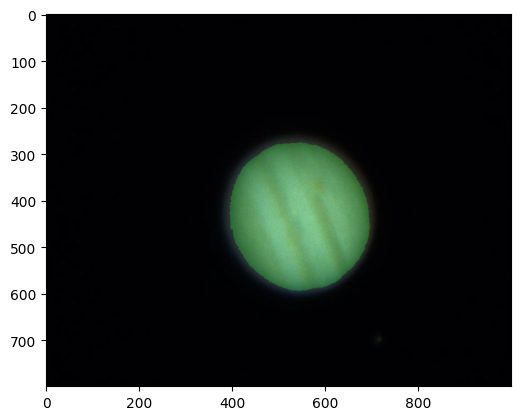

In [11]:
lum = cv2.cvtColor(jupiter_frame1, cv2.COLOR_BGR2Lab)[:, :, 0]
lum = cv2.GaussianBlur(lum, (5, 5), 0)
a, mask = cv2.threshold(
    lum, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
print(a)

plot_overlay(jupiter_frame1, mask)

It looks like otsu is not doing as well with the fuzzy edge of jupiter, but better with the moon, not perfect though, may need to adjust if it consistently does this? In both cases with is cutting off parts of the object

lets look into having this be a little bit adaptive

### Dig into histogram

In [12]:
jupiter.ravel()

array([4, 2, 2, ..., 4, 2, 2], dtype=uint8)

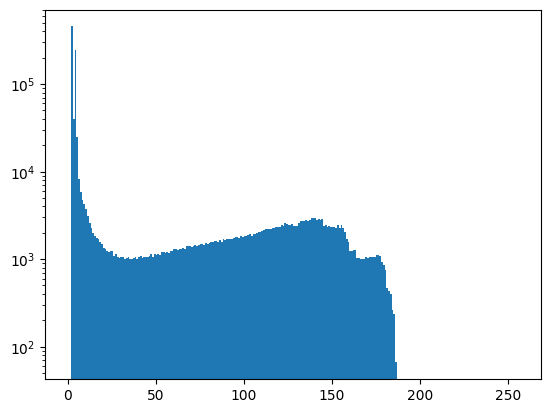

In [13]:
plt.hist(jupiter.ravel(), 256, [0, 256])
plt.yscale("log")
plt.show()

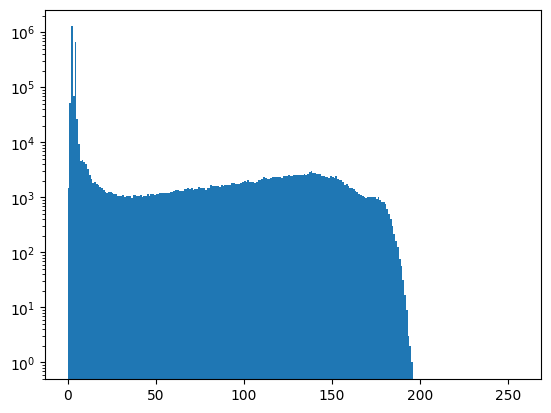

In [14]:
plt.hist(cv2.GaussianBlur(jupiter_frame1, (5, 5), 0).ravel(), 256, [0, 256])
plt.yscale("log")
plt.show()

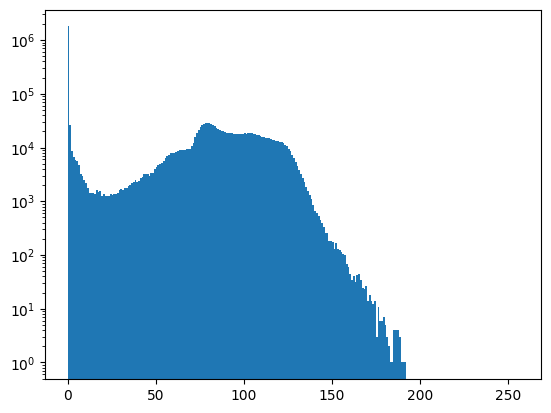

In [15]:
plt.hist(moon.ravel(), 256, [0, 256])
plt.yscale("log")
plt.show()

### Algorithm

68.0
68.0


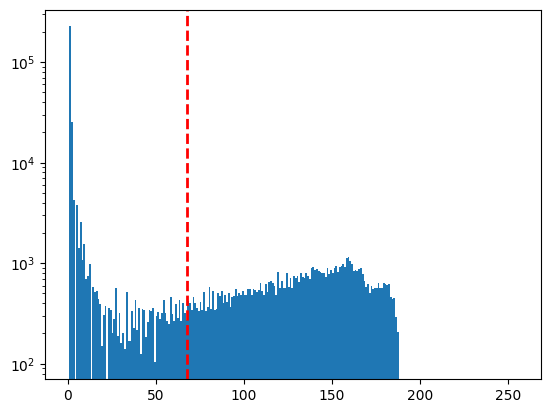

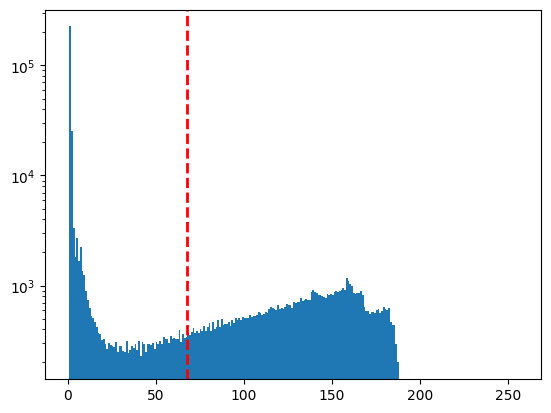

In [16]:
lum = cv2.cvtColor(jupiter, cv2.COLOR_BGR2Lab)[:, :, 0]
thresh1, _ = cv2.threshold(lum, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(thresh1)

lum_blur = cv2.GaussianBlur(lum, (5, 5), 0)
thresh2, _ = cv2.threshold(lum_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(thresh2)

plt.hist(lum.ravel(), 256, [0, 256])
plt.axvline(x=thresh1, color="r", linestyle="--", linewidth=2)
plt.yscale("log")
plt.show()

plt.hist(lum_blur.ravel(), 256, [0, 256])
plt.axvline(x=thresh2, color="r", linestyle="--", linewidth=2)
plt.yscale("log")
plt.show()

67.0
67.0


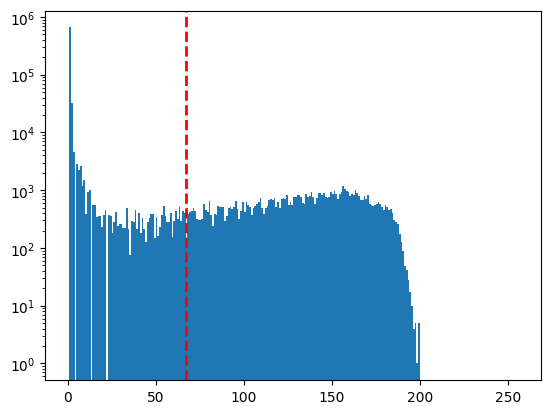

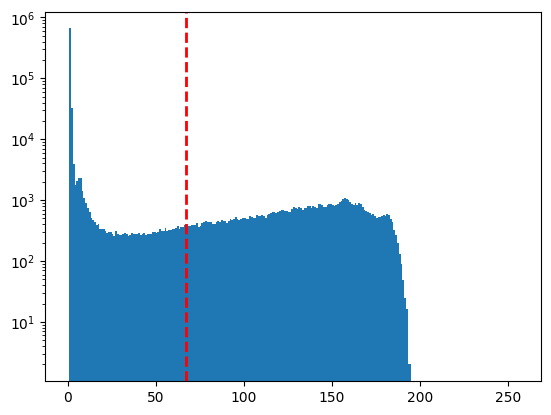

In [17]:
lum = cv2.cvtColor(jupiter_frame1, cv2.COLOR_BGR2Lab)[:, :, 0]
thresh1, _ = cv2.threshold(lum, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(thresh1)

lum_blur = cv2.GaussianBlur(lum, (5, 5), 0)
thresh2, _ = cv2.threshold(lum_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(thresh2)

plt.hist(lum.ravel(), 256, [0, 256])
plt.axvline(x=thresh1, color="r", linestyle="--", linewidth=2)
plt.yscale("log")
plt.show()

plt.hist(lum_blur.ravel(), 256, [0, 256])
plt.axvline(x=thresh2, color="r", linestyle="--", linewidth=2)
plt.yscale("log")
plt.show()

68.0
64.0


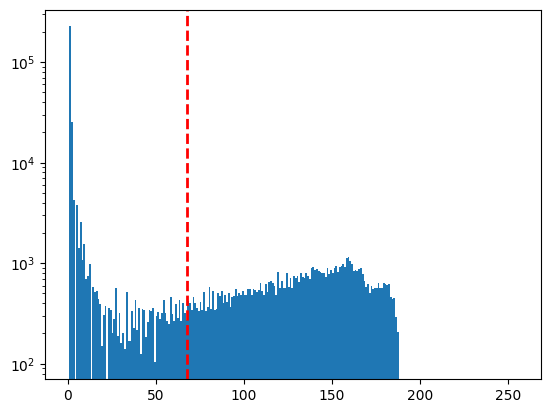

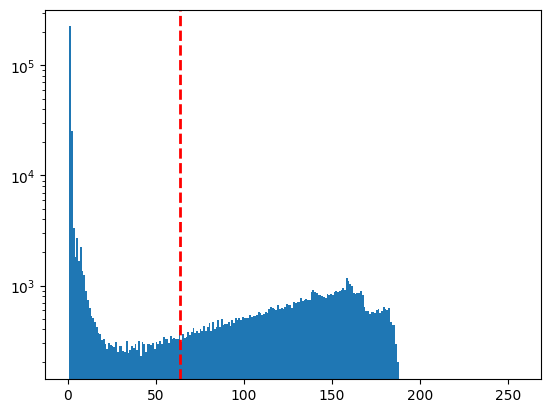

In [17]:
# does it matter if we use luminance or just gray?

lum = cv2.cvtColor(jupiter, cv2.COLOR_BGR2Lab)[:, :, 0]
gray = cv2.cvtColor(jupiter, cv2.COLOR_BGR2GRAY)

thresh1, _ = cv2.threshold(lum, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(thresh1)

thresh2, _ = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(thresh2)

plt.hist(lum.ravel(), 256, [0, 256])
plt.axvline(x=thresh1, color="r", linestyle="--", linewidth=2)
plt.yscale("log")
plt.show()

plt.hist(lum_blur.ravel(), 256, [0, 256])
plt.axvline(x=thresh2, color="r", linestyle="--", linewidth=2)
plt.yscale("log")
plt.show()

doesn't look like it matters much let's use gray

## Heuristic adjustments

68.0


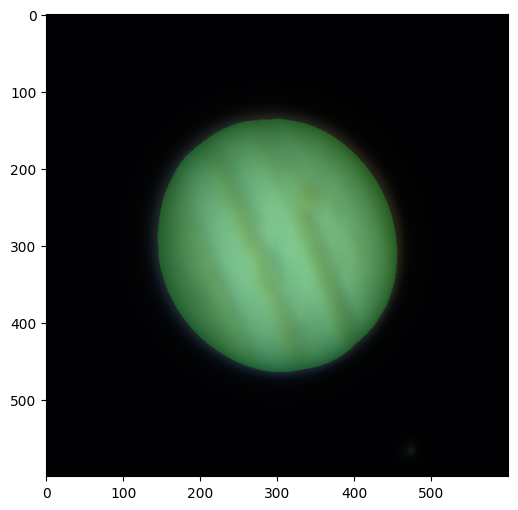

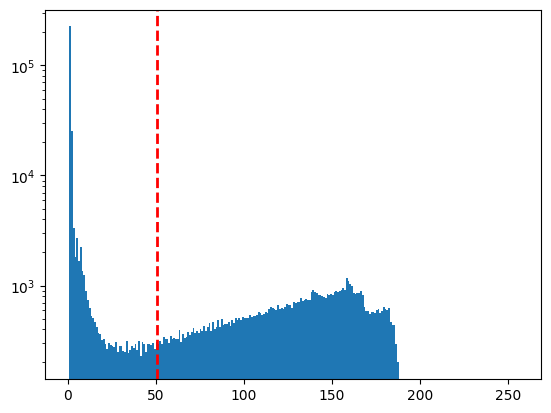

In [18]:
lum = cv2.cvtColor(jupiter, cv2.COLOR_BGR2Lab)[:, :, 0]
lum_blur = cv2.GaussianBlur(lum, (5, 5), 0)
thresh, _ = cv2.threshold(
    lum_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU 
)
print(thresh)
_, mask = cv2.threshold(
    lum_blur, int(thresh * 0.75), 255, cv2.THRESH_BINARY
)

plot_overlay(jupiter, mask)

plt.hist(lum_blur.ravel(), 256, [0, 256])
plt.axvline(x=int(thresh * 0.75), color="r", linestyle="--", linewidth=2)
plt.yscale("log")
plt.show()

46.0


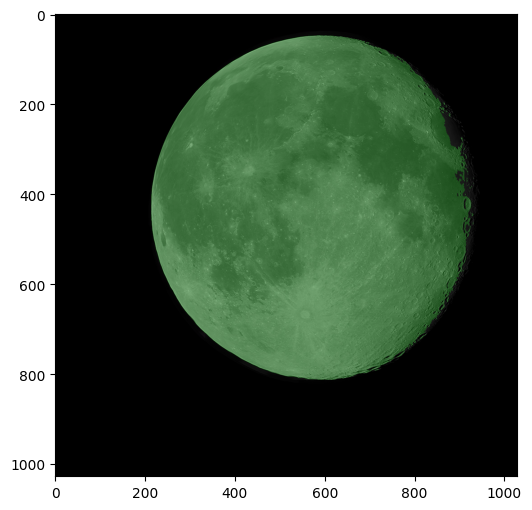

In [19]:
gray = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh, _ = cv2.threshold(
    gray_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU 
)
print(thresh)
_, mask = cv2.threshold(
    gray_blur, int(thresh * 0.75), 255, cv2.THRESH_BINARY
)

plot_overlay(moon, mask)

67.0


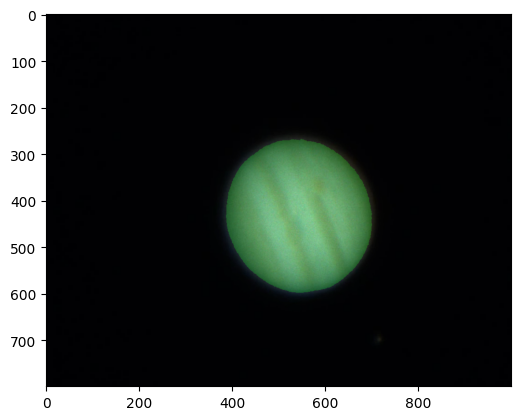

In [56]:
lum = cv2.cvtColor(jupiter_frame1, cv2.COLOR_BGR2Lab)[:, :, 0]
lum_blur = cv2.GaussianBlur(lum, (5, 5), 0)
thresh, _ = cv2.threshold(
    lum_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU 
)
print(thresh)
_, mask = cv2.threshold(
    lum_blur, int(thresh * 0.75), 255, cv2.THRESH_BINARY
)

plot_overlay(jupiter_frame1, mask)

this looks like a conservative threshold but definitely does not seem to be misclassifiying background as foreground, so will do just fine for now